# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [1]:
#https://www.youtube.com/playlist?list=PLBv09BD7ez_5_yapAg86Od6JeeypkS4YM
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


# Understanding the Data
**Age**- The age at which the patient was recognized

**Operation Year**- The year the patient was operated

**Axil Nodes**- The number of axil nodes found in the patient

**Survival Status**: **1- the patient survived 5 years or longer, 2- the patient died within 5 year**

### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [2]:
names={'age':'age','operation_Year':'yr','axil_nodes':'nodes','survival_status':'status'}
df.rename(columns=names, inplace=True)
df1=df[1:]
df1.head()

,age,yr,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


In [3]:

x=df1['status'].value_counts()
y=df.age.count()
print(x)
print('_______________________________\n\n',y)
not_survive=(x[1]/y *100)
survive=(x[0]/y)*100
print("Survived={} & Not Survived={}" .format(survive, not_survive))

1    225
2     81
Name: status, dtype: int64
_______________________________

 307
Survived=73.28990228013029 & Not Survived=26.384364820846905


## **The Data seems to be imbalanced**

There are **225** points of **class 1** & **81** points for **class 2**.

There are total of **307 points**.

There are 4 features, out of which 

- Survival_Status: Is discrete and 2 class
- Age: Is a Continuous Variable
- Node:Is a Continuous Variable
- Year: Is a continuos Variable

In [4]:
#print(df1.dtypes)
dtype={'age':int,'yr':int,'nodes':int,'status':str}
hbm=df1.astype(dtype, copy=False)
#print(hbm.dtypes)
#df1.head()

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

# Question which needs to be answered!

Is the operation effective?

Is there are relationship between the age, aux_node & year with survival status?
- Does age affect the survival status?
- Does number of auxilary nodes affect the survival status?
- Does the year affect the survival status?

Can we create a model, which predicts the survival status of the person given the 2 attributes age & survival status?(Year is not included because when we enter a new query point, the year will be a present value like 2022, 2023 etc!)

Note: But inference on the survival category based on year can help us understand if there is any other factor relevant to the year, like the **doctor who performed the operation** or **Hospital Management** which affected the patient survival status.

Is there a relationship between the age & aux_nodes?

Is there a relationship between year & aux_nodes?

Is there any other relationship visible?

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

#https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

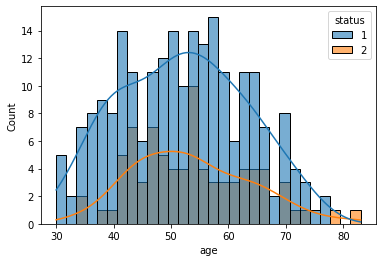

In [14]:
plt1=sns.histplot(hbm,x='age', hue='status', kde=True, legend=True, alpha=0.6, bins=30)

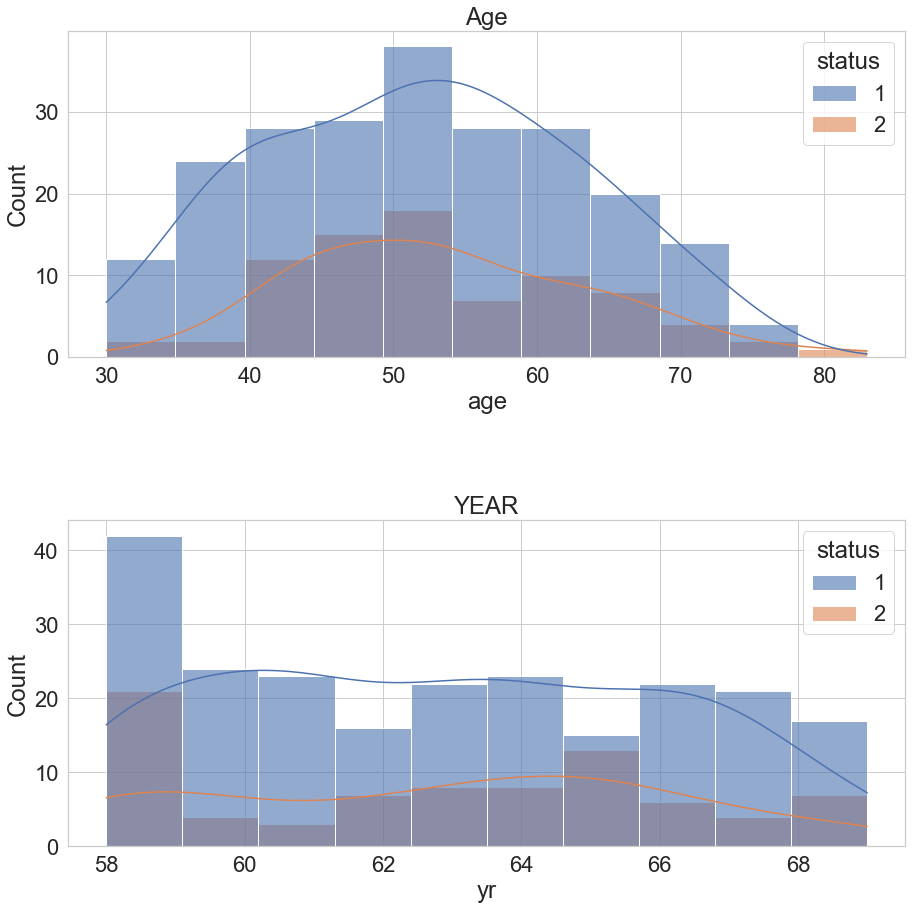

In [11]:
#Plotting the PDF
warnings.filterwarnings('ignore')
plt.grid(True)
#sns.load_dataset()
sns.set(font_scale=2,rc={'figure.figsize':(15,15)})

sns.set_style('whitegrid')
plt.figure(1)
plt.subplot(2,1,1)
plt.title('Age')
plt1=sns.histplot(hbm,x='age', hue='status', kde=True, legend=True, alpha=0.6)
plt.subplot(2,1,2)
plt. subplots_adjust(hspace=0.5)
plt.title('YEAR')
plt1=sns.histplot(hbm,x='yr', hue='status', kde=True, alpha=0.6)
plt.show()
#The Data Age, year & nodes are not well separated and hence may not be a good feature based on which the model can be designed

# Conclusion from the above Plot:

- The year in which the operation was done does not seem to have any relation with the survival rate as the histogram is not showing any pattern and is crowded.


- At all age the probability is high that a person who undergoes the surgery will survive for more than 5 years as compared to the "Not survive for the next 5 year" because of the effectiveness of the surgery, and not because of the age.


- Deep Diving in to the year can give details on other aspects of the hospital management maybe, because as year changes only the staff and management change but the surgery procedures stay the same.


- We can see that in the year 59 the class 1 is **approximately** equal to the class 2, but in other year the gap between both the classes has increased. Positively in years 60,61,63,64,66,67 & 68. But negatively in the year 65, because the gap is very small between the 2 classes.

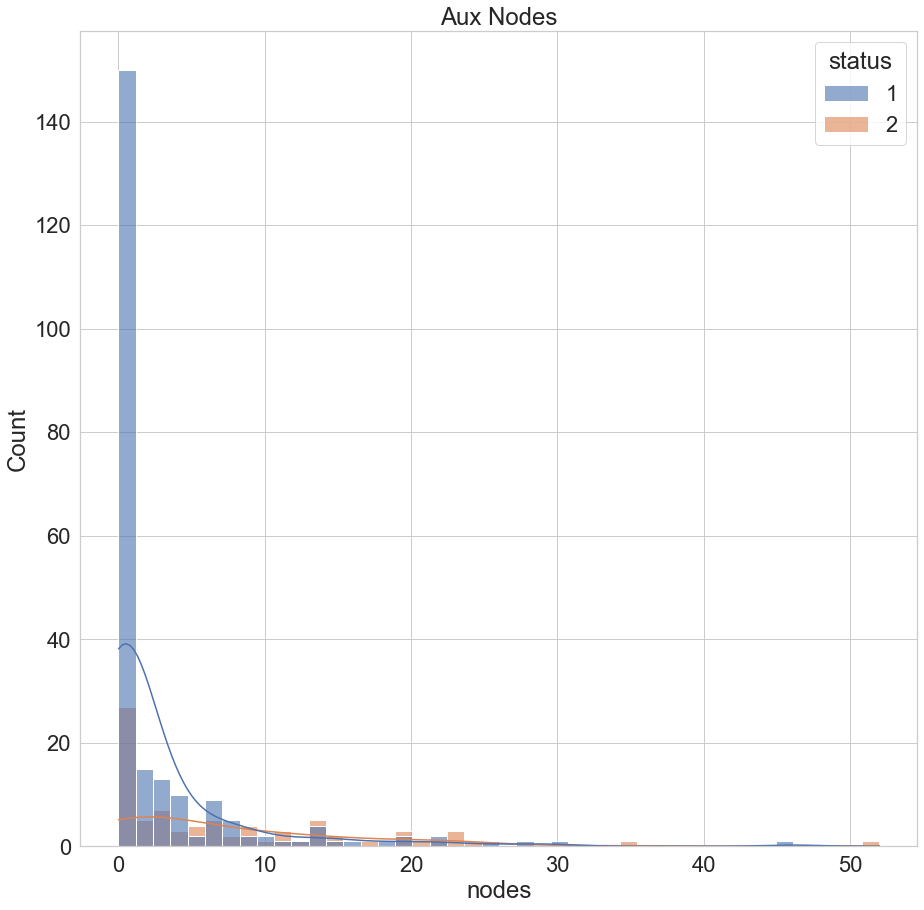

In [10]:
#Plotting the PDF
warnings.filterwarnings('ignore')
sns.set(font_scale=2)
sns.set_style('whitegrid',rc={'figure.figsize':(15, 15)})
plt.grid(True)
plt.title('Aux Nodes')
sns.set_style('whitegrid',rc={'figure.figsize':(15, 15)})
plt1=sns.histplot(hbm,x='nodes', hue='status', kde=True, alpha=0.6)
plt.show(plt1)

#Even though the data is not well separated based on the class, but based on the pdf we can understand that as the "Number of nodes"
#increases the number of people in class 1 decreases, so yes people with more nodes are having les chance of survival.

# Conclusion from the above Plot:
- The probability that the patients with nodes between 0 to 9(Approximately) to survive more than 5 years after the operation is more than the patients who have more number of nodes. That is the patients with nodes from 0-9 have a high probability that they will belong to class 1 as compared to class 2.

# Plotting PDF using KDE PLOT

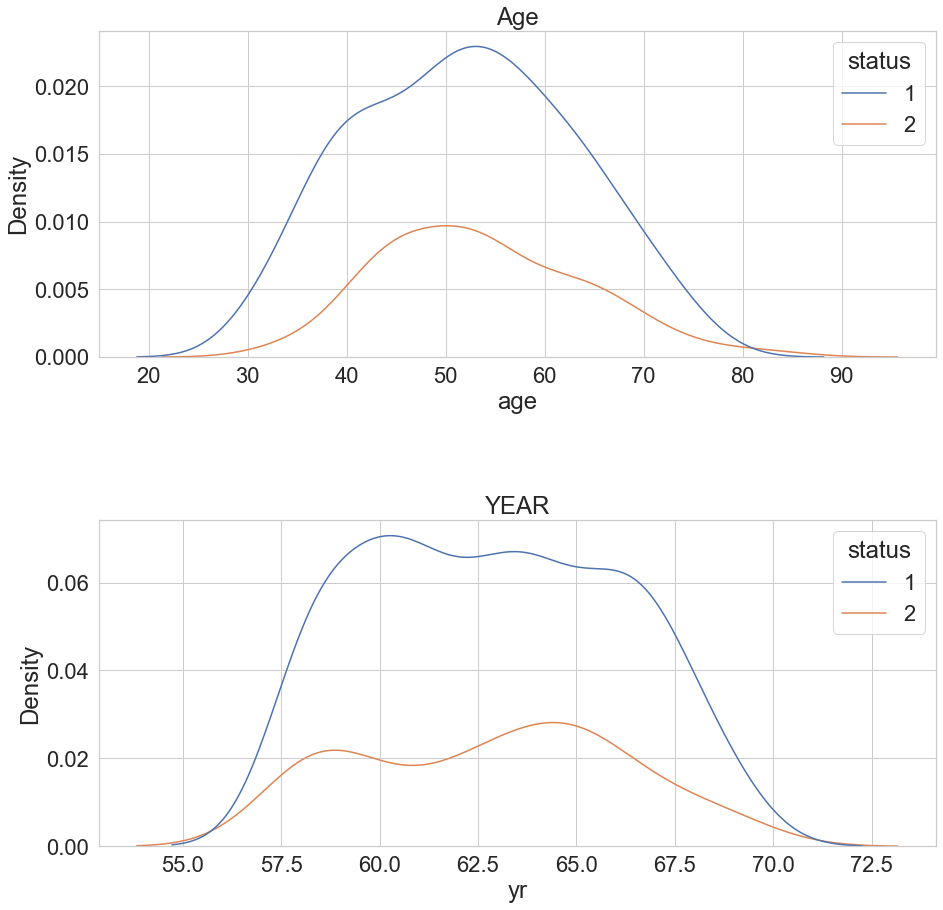

In [13]:
sns.set(font_scale=2)
sns.set_style('whitegrid',rc={'figure.figsize':(50,50)})
plt.figure(1)
plt.subplot(2,1,1)
plt.title('Age')
sns.kdeplot(data=hbm, x='age', hue='status', legend=True)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.title('YEAR')
sns.kdeplot(data=hbm, x='yr', hue='status', legend=True)

plt.show()
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
#https://www.statology.org/seaborn-font-size/#:~:text=Note%20that%20the%20default%20value,use%20this%20syntax%20in%20practice.

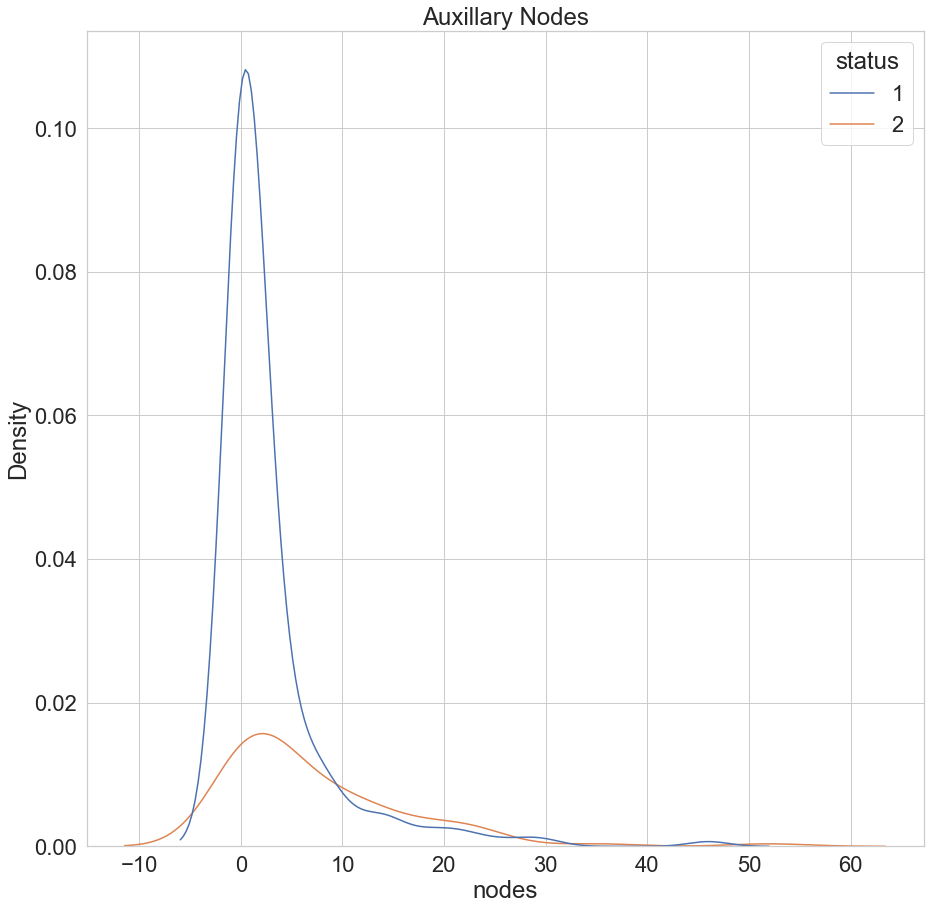

In [14]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

plt.title('Auxillary Nodes')
sns.kdeplot(data=hbm, x='nodes', hue='status', legend=True)
plt.show()

In [15]:
#sns.barplot(x='status',y='age', data=hbm)
alive=hbm[(hbm['status']=='1') & (hbm['nodes']==0)].age.count()
total=hbm[hbm['status']=='1'].age.count()
print('Out of the total {}, with a node of class 0, {} have survived for more than 5 years' .format(total,alive))

Out of the total 225, with a node of class 0, 117 have survived for more than 5 years


#  **Insights from PDF's of the Data**
- The Data Age, year & nodes are not well separated and hence we may not be able to create a model which could classify Class 1 & 2 based on the 3 features **Individually**. That is no one feature can effectively predict the class alone.


- From the PDF we can see that the Density for the nodes 0-10 have a very high chance of belonging to class 1 and there is a huge gap in the PDF for both classes, hence it may be effective for classification.


- The Operation is of course effective in a positive manner because, We have data for 12 years & the average number of patients per year is 26, & hence we may not consider this as a biased data, because out of the total patients who came, 225 patients have lived more than 5 years and only 81 of the patients have lived less than 5 years, so yes the operation is effective, against cancer.  **USING BAR CHART which is plotted below**


- The people with less "Auxillary Nodes" especially with "O" had a high chance of survival and belonged to class 1.


- Based on the count we can see that the people with node "0", out of 225 people with node 0, 117 have survived more than 5 years 


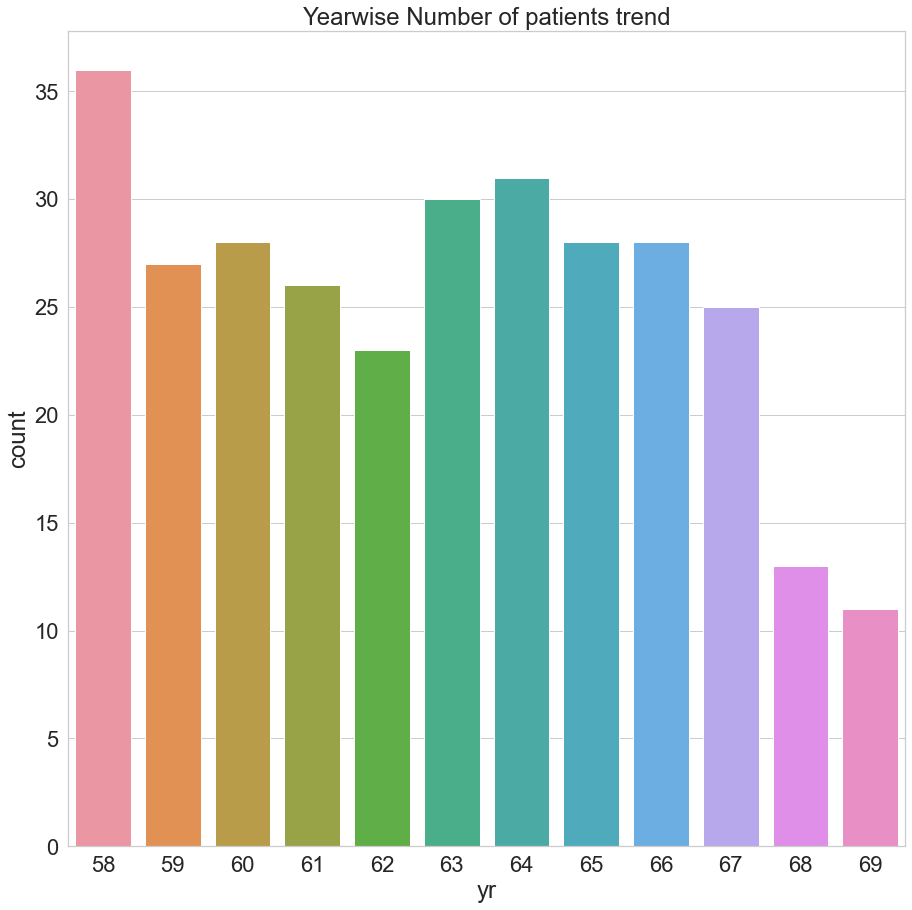

In [16]:
#Plotting a bar chart with year & number of customers
yr=hbm.groupby('yr')
ct=yr.count()
ct['count']=ct['age']
#print(ct)
ct=ct.iloc[:,[3]]
#print(ct)
ct.reset_index(level=0, inplace=True)
#print(ct.mean())#Calculating the mean
plt.grid(True)
plt.figure(1)
plt.title('Yearwise Number of patients trend')
plt.xlabel('Years')
plt.ylabel('Count')
sns.barplot(x='yr', y='count', data=ct)

plt.show()


In [17]:
x=yr.yr.count().mean()
print('Average Age', x)
y=yr.yr.count().std()
print('Deviation', y)

Average Age 25.5
Deviation 7.103136311133657


# Plotting CDF


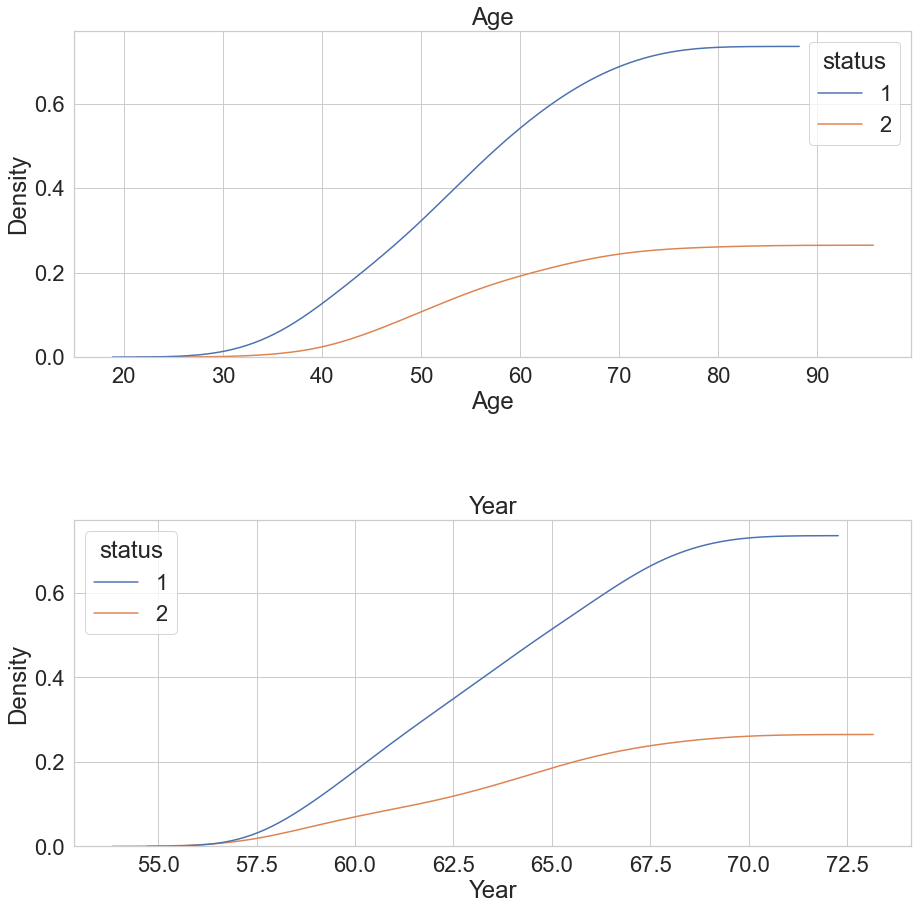

In [18]:
sns.set_style('whitegrid')
plt.grid(True)
plt.figure(1)
plt.subplot(2,1,1)
plt.title('Age')
plt.xlabel('Age')
sns.kdeplot(data=hbm, x='age', hue='status', legend=True, cumulative=True)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.xlabel('Year')
plt.title('Year')
sns.kdeplot(data=hbm, x='yr', hue='status', legend=True, cumulative=True)
plt.show()

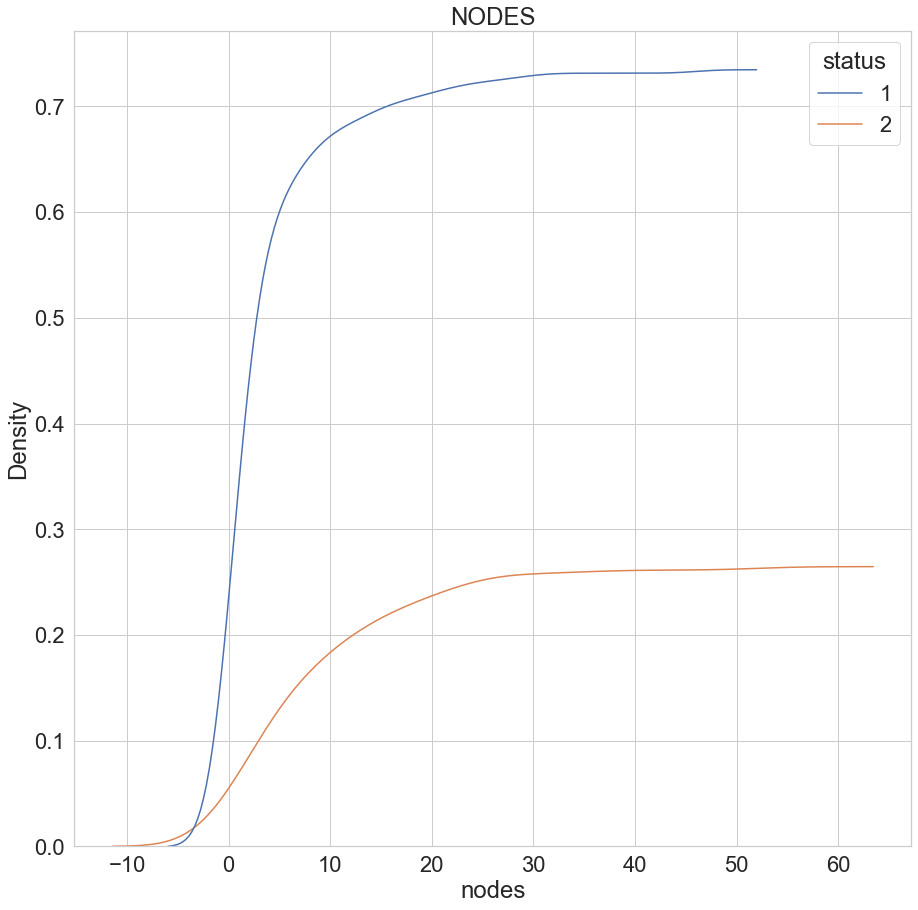

In [19]:
plt.title('NODES')
sns.kdeplot(data=hbm, x='nodes', hue='status', legend=True, cumulative=True)
plt.show()

# Conclusion from the CDF
- From the CDF it is evident that the probability of people with less nodes to belong to class 1 is more, because the area enclosed under the curve for class 1 is **greater** than class 2 at each point

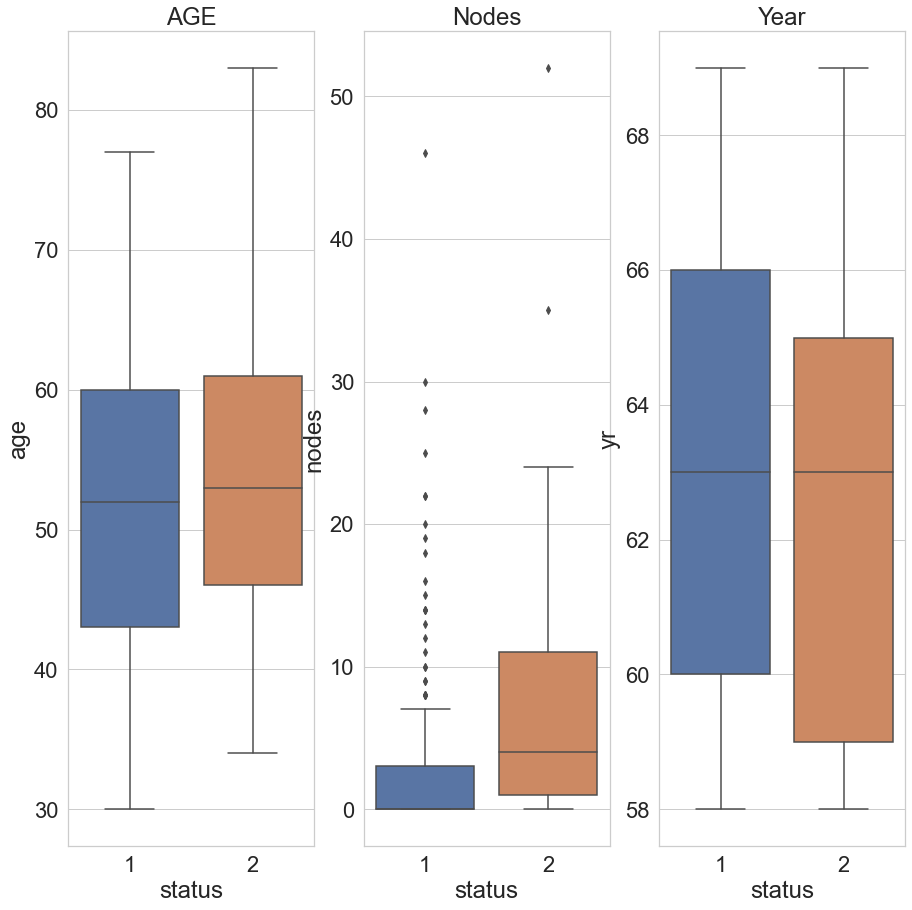

In [20]:
sns.set(font_scale=2)
plt.figure(1)
sns.set_style('whitegrid')
plt.subplot(1,3,1)
plt.title('AGE')
sns.set_style('whitegrid')
sns.boxplot(y='age',x='status',data=hbm)
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,3,2)
plt.title('Nodes')
sns.set_style('whitegrid')
sns.boxplot(y='nodes',x='status',data=hbm)
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,3,3)
plt.title('Year')
sns.set_style('whitegrid')
sns.boxplot(y='yr',x='status',data=hbm)
plt.show()

# Conclusion based on the Box Plot
   **Age**
- People with less age in the range of 30-33 survived more than 5 years.(**Have done further Analysis**)
- The patients above the age 78 did not survive more than 5 years and belonged to the Survival Status= 2
- The 50 percentile value for **Class 1** is less than **Class 2** hence we may say that as the age is an important factor deciding the class of the data point.

**Nodes**
- The nodes have a very close 25th percentile & 50th percentile such that they are intersecting. Hence based on the PDF & CDF of the nodes, we can conlcude that as node decreases the **Probability of the Patient belonging to class 1** Increases.
- Also 50 percentile of the patients with class 1 have the node as 0! which is evident that patients with class 0 have a high probability of surviving the next 5 years.
- The people in class 2, have 25th and 75th percentile value with a comparatively high spread. The nodes only 25% of people have nodes less than 4 in **Class 2** whereas 75 % of the patients in the **class 1** have a node less than 4.

**Year**
- The year has a box plot but it may not be a relevant causation for the Status of the patient.
- The 50th percentile is the same for both the classes.

In [21]:
print(hbm[(hbm['status']=='2') &  ((hbm['age']>30)) & (hbm['age']<34) ].age.count())
# 0 values in class 2 for age 30-34
print(hbm[(hbm['status']=='2') &  ((hbm['age']>=30)) & (hbm['age']<=35) ].age.count())
# 2 values in class 2 for age 35
print(hbm[(hbm['age']>=30) & (hbm['age']<=34)])

0
2
    age  yr  nodes status
1    30  64      1      1
2    30  62      3      1
3    30  65      0      1
4    31  59      2      1
5    31  65      4      1
6    33  58     10      1
7    33  60      0      1
8    34  59      0      2
9    34  66      9      2
10   34  58     30      1
11   34  60      1      1
12   34  61     10      1
13   34  67      7      1
14   34  60      0      1


# Conclusion from above analysis on Point 1:
- Age seems to be an important factor because where the age is  between 30-34, patients with also the nodes 30 have survived for more than 5 years.
- Also at the age 30-34, the number of patients who survived is more than the patients who did not survive.

In [22]:
print(hbm['age'].max())
print(hbm[(hbm['age']>=78) & (hbm['age']<=83)])

83
     age  yr  nodes status
305   78  65      1      2
306   83  58      2      2


# Code from Above Analysis on Point 2
- We can see that above age 78, we have only 2 observations who have a node count of 1,2(Which is less than 10) but still they belong to class 2.
- We may not come to a conclusion that **People above age 78 have a high probabilty of belonging to class 2** because of low number of data points, but if we had more data points we can come to that conclusion.

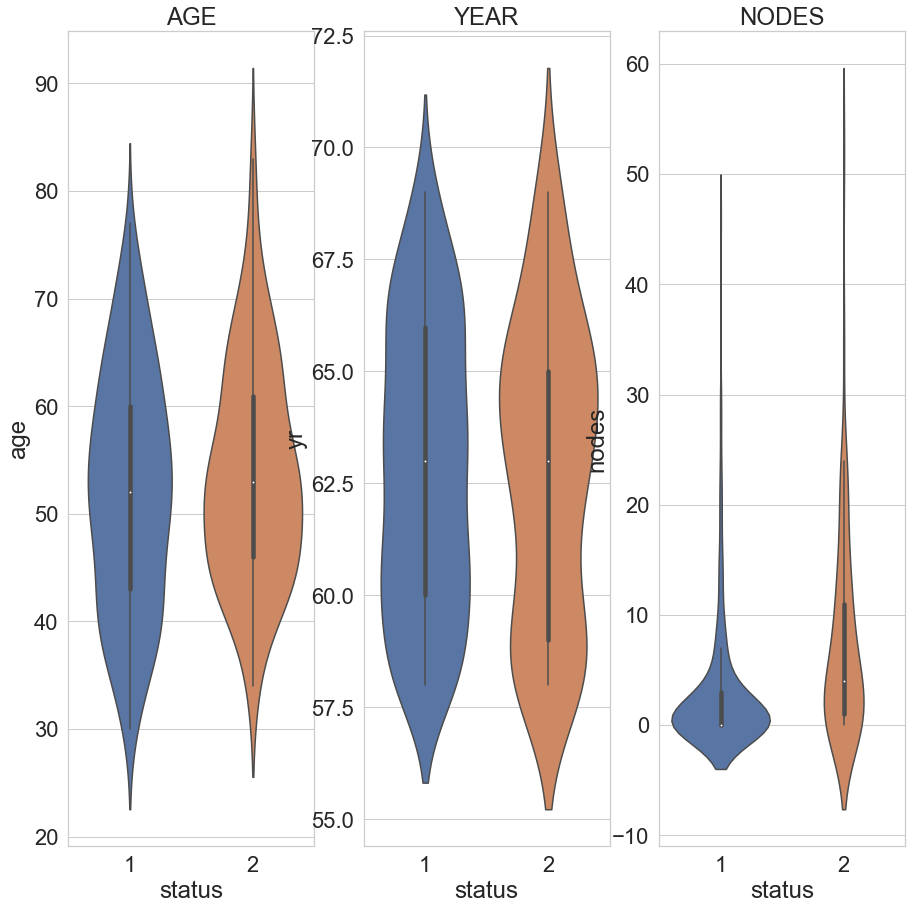

In [23]:
sns.set(font_scale=2)
plt.figure(1)
sns.set_style('whitegrid')
plt.subplot(1,3,1)
sns.set_style('whitegrid')
plt.title('AGE')
sns.violinplot(y='age',x='status', data=hbm, alpha=0.5)
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,3,2)
sns.set_style('whitegrid')
plt.title('YEAR')
sns.violinplot(y='yr',x='status', data=hbm, alpha=0.5)
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,3,3)
sns.set_style('whitegrid')
plt.title('NODES')
sns.violinplot(y='nodes',x='status', data=hbm, alpha=0.5)
#https://mode.com/blog/violin-plot-examples/
plt.show()

# Conclusion based on Violin Plots
 **Age**
- Addition to the conclusions based on the Box Plot, we can see that there are many people concentrated around the age 52 for the class 1
- Whereas in class 2 the maximum concentration is at the age 50, below the 50th percentile.

 **Nodes**
- There are more patients concentrated at the node of  0 for class 1
- The spread of patients is class 2 is across 0 to 10.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


<Figure size 1080x1080 with 0 Axes>

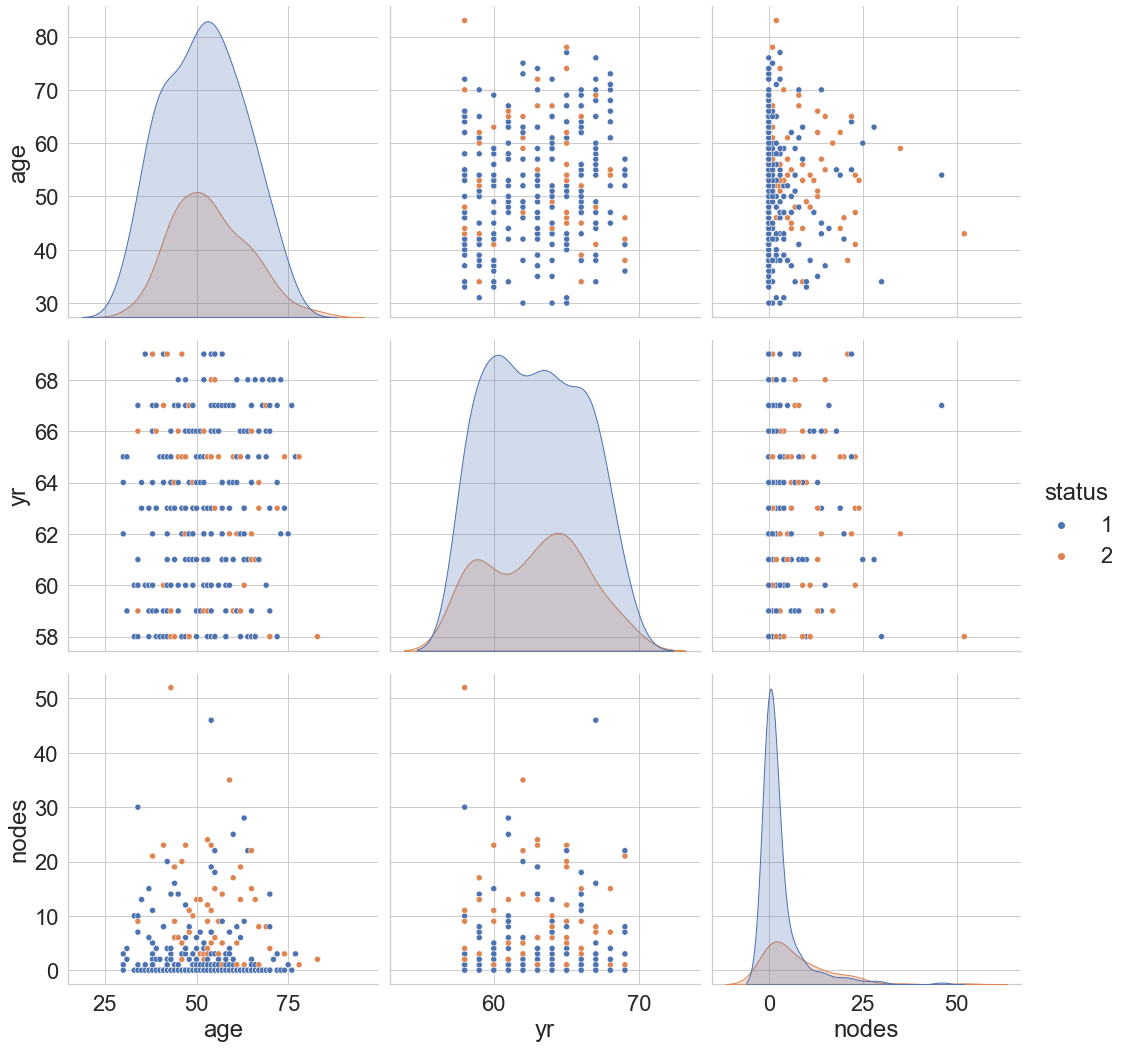

In [24]:
fig=plt.figure(figsize=(15,15))
sns.set(font_scale=2)
#plt.grid(True)
sns.set_style('whitegrid')
sns.pairplot(hbm, hue='status',size=5)
plt.show()

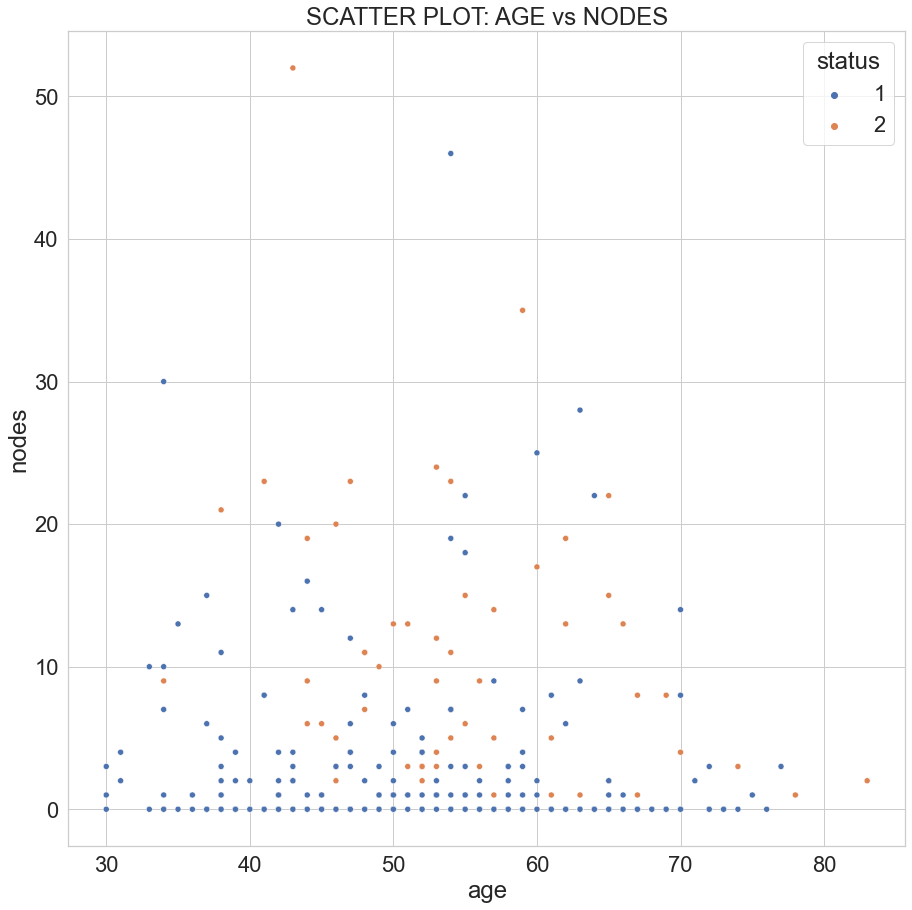

In [25]:
sns.set(font_scale=2)
sns.set_style('whitegrid')
plt.title('SCATTER PLOT: AGE vs NODES')
sns.scatterplot(y='nodes', x='age', data=hbm, hue='status')
plt.show()

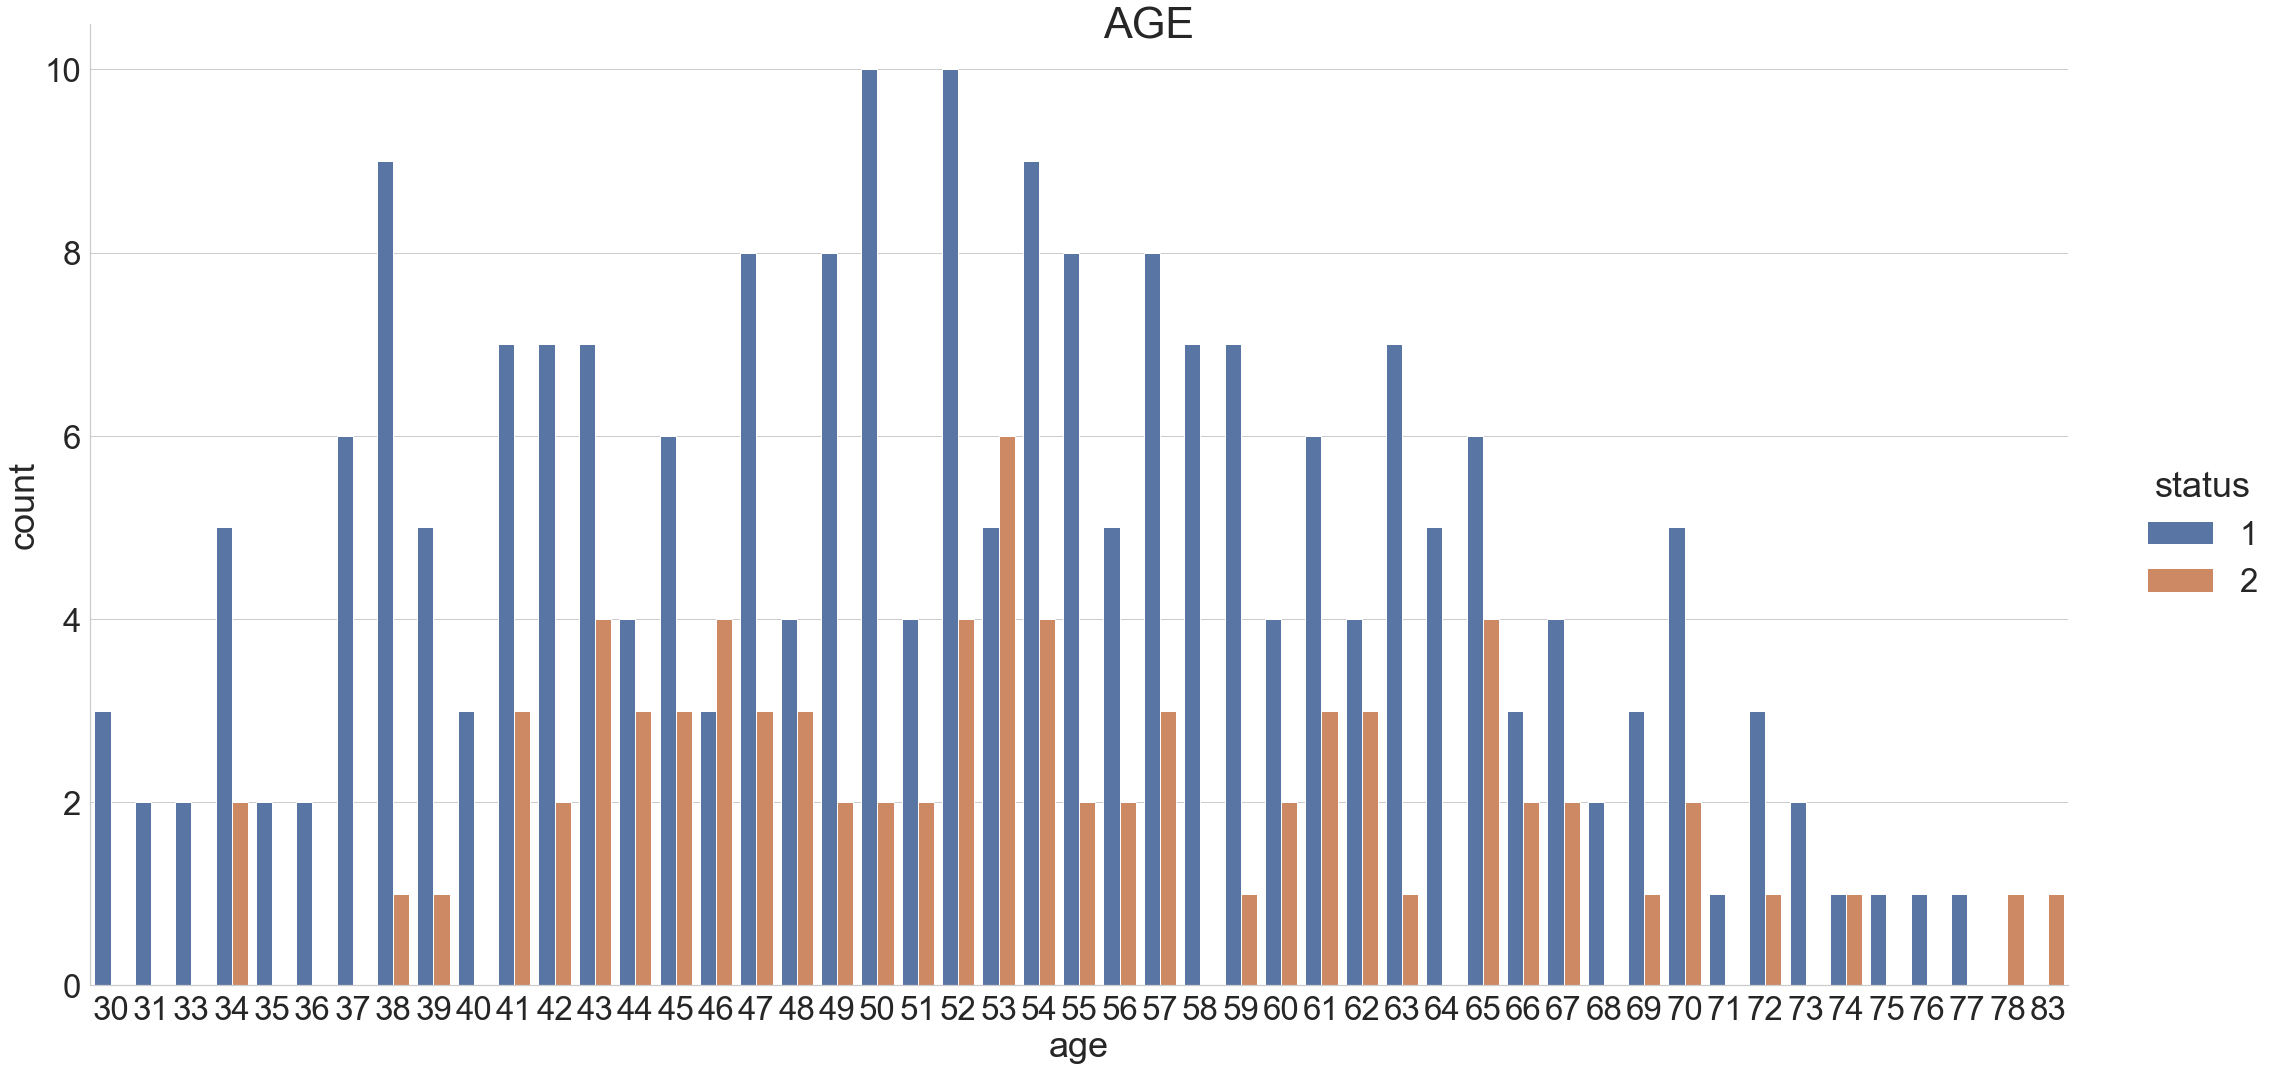

In [26]:
sns.set(font_scale=3)
sns.set_style("whitegrid")
f=sns.catplot(x='age', kind='count',hue='status', data=hbm, height=15, aspect=2, margin_titles=True)
f.fig.suptitle('AGE')
plt.show()

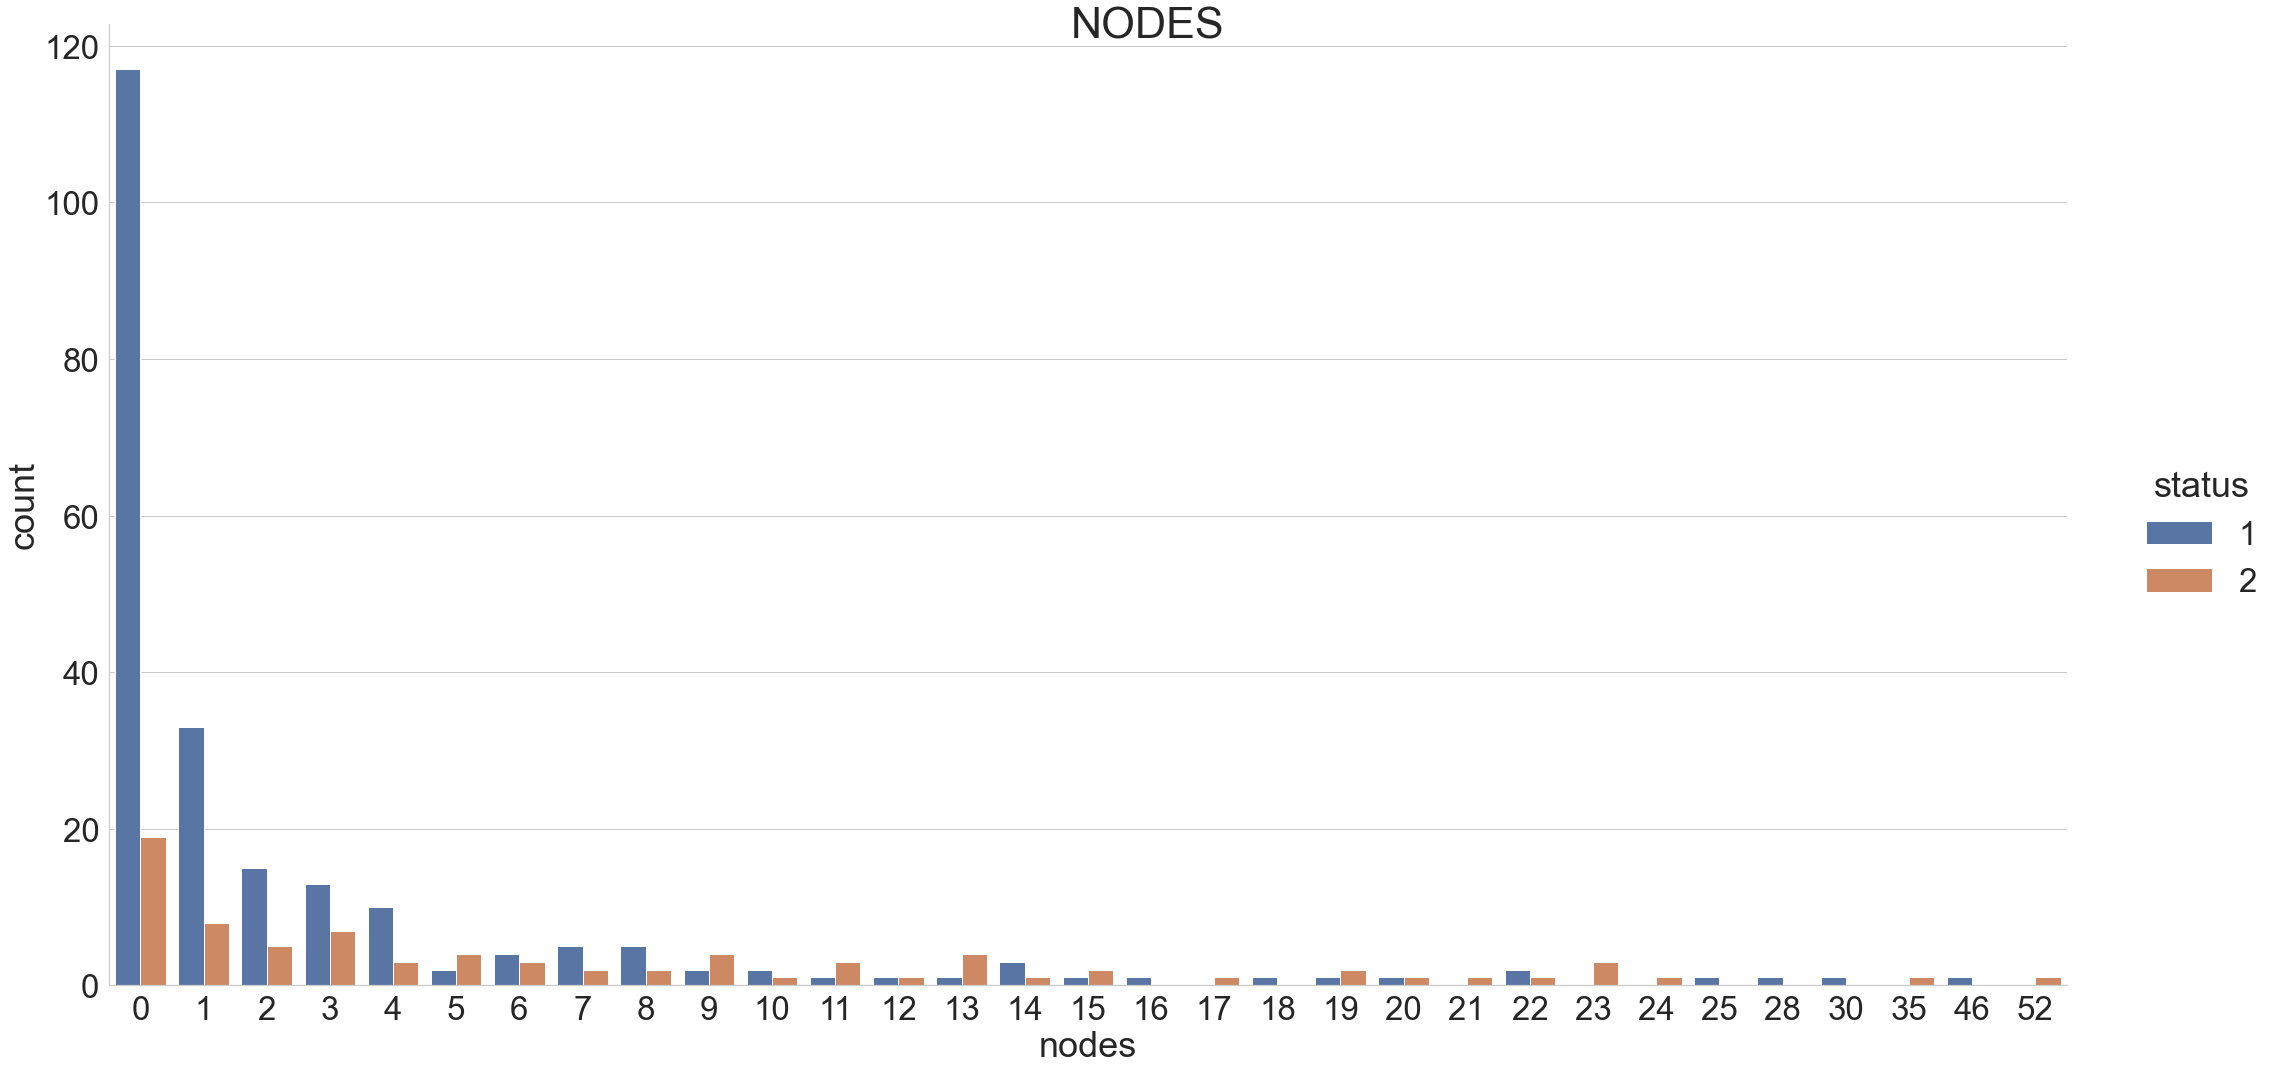

In [27]:
sns.set_style("whitegrid")
f=sns.catplot(x='nodes', kind='count',hue='status', data=hbm, height=15, aspect=2, margin_titles=True)
sns.set(font_scale=3)
f.fig.suptitle('NODES')
plt.show()

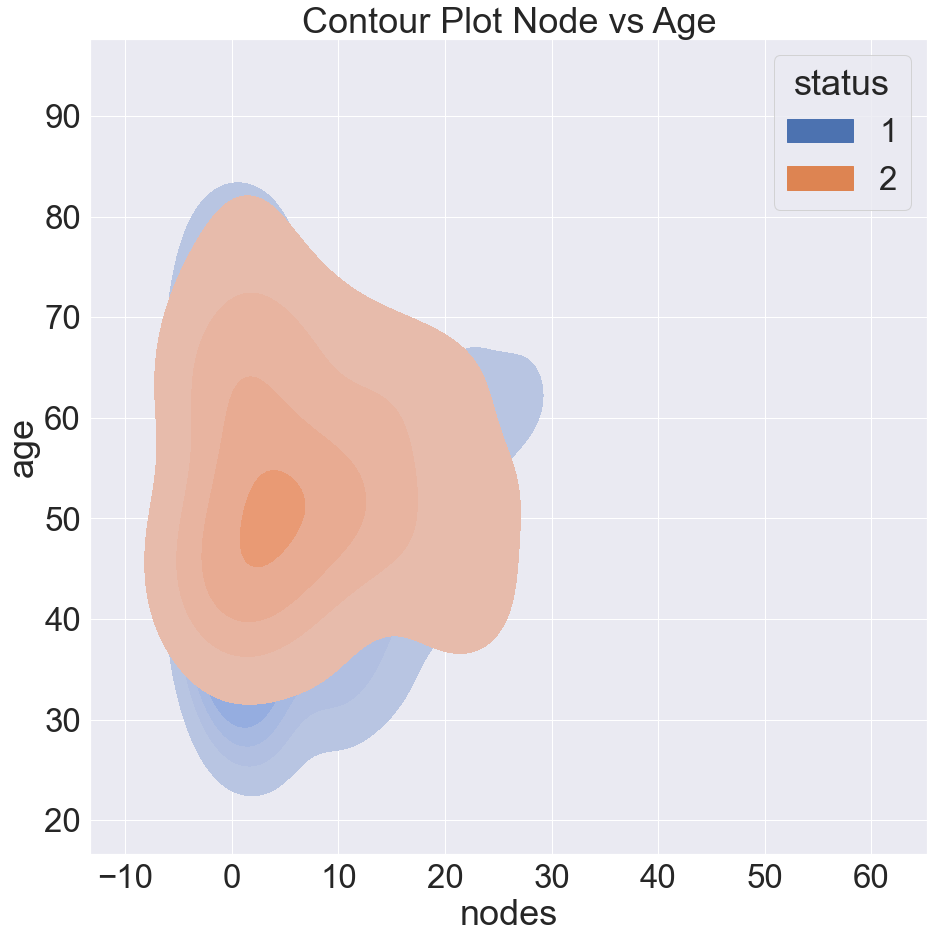

In [119]:
plt.title('Contour Plot Node vs Age')
sns.kdeplot(x='nodes',y='age',data=hbm, hue='status',fill=True)
plt.show()

# Conclusion from Scatter Plot
- We can create a KNN Based classification model with 2 features (Age & Node) which may be effective in classifying the classes.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# Final Obervations
- The key features necessary and which would help in a classification task would be the **Age of the patients** & **Auxillary Nodes**

- The operation is firstly effective because out of the total 306 patients who underwent the surgery 225 patients have survived for more than 5 years. That is Survived=73.28990228013029 % & Not Survived=26.384364820846905 %.
- Based on the barchart plotted with the average of 25.5 and Standard Deviation of 7.5 we can say that the data is not imbalanced, but it is actually because of the effectiveness of the operation that patients have survived more than 5 years.
- The **Year of Operation** is not linked to the survival rate or helpful in classification of the classes, however it can be used to understand various aspects related to the **Management of the Hospital, Doctor, Staffing etc** if explored even further with data related to the hospital during those years.
- On a ground rule as the number of nodes increases the probability of **Surviving for more than 5 years** decreases.
- Also as the **Age** increases the probability of **Surviving less than 5 years** increases.
- From the bar plot, we can see that after the age of 70, the patients who **Survive less than 5 years** are either more than **Survive more than 5 years** or there a no survivors from class 1.
- Also patients with the age 30-40, maximum patients belong to the class 1.
- From the barplot it is clear that till the **Number of Auxillary Nodes** is less than **4**, the probability of the patient surviving more than 5 years is more, because till the node_size=4, the difference of number of people in class 1 & class 2is clear and high, but beyond that, there is no common pattern.
- Also from the PDF drawn it is clear that as node size increases the probability of patient surviving the next 5 years decreases.
- Because the **Age** and the **Node** are so closely packed as shown in the contour plot, we can only predict the **Survivability** for a small portion where both the plots do not **Intersect**
- However a model such as KNN, may be effective. But Logistic Regression may fail because no single linear feature can separate the classes.
- **Most Importantly** None of the features have a **Linear Relationship** with each other.